In [3]:
import matplotlib.pyplot as plt
from simtk.openmm import app
from simtk import openmm, unit
from openeye import oechem
from sys import stdout
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import sys
import string
from rdkit import Chem
import lxml.etree as etree

from simtk.openmm.app import element as elem
from simtk.openmm.app import Topology

import os
import math
import copy
import re
import numpy
import random

from simtk import openmm, unit

import time

import itertools

from rdkit import Chem


import sys
import io
from IPython.nbformat import current
import openeye.oechem
import openeye.oeomega
import openeye.oequacpac

from openeye import oechem, oequacpac
from openeye.oechem import *
from openeye.oedepict import *
from IPython.core.display import Image, display
from openforcefield.typing.engines.smirnoff import forcefield_rdk
from openforcefield.typing.engines import smirnoff
#from openforcefield import *
from openforcefield.utils import *
def RetrieveMol2Block(fileLikeObject, delimiter="@<TRIPOS>MOLECULE"):
    """generator which retrieves one mol2 block at a time
    """
    mol2 = []
    for line in fileLikeObject:
        if line.startswith(delimiter) and mol2:
            yield "".join(mol2)
            mol2 = []
        mol2.append(line)
    if mol2:
        yield "".join(mol2)
# sys.path.insert(0, os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/utils/")
# #from utils import *
# from utils import get_data_filename, extractPositionsFromOEMol, generateTopologyFromOEMol, extractPositionsFromRDKMol

# sys.path.insert(0, os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/typing/engines/smirnoff/")
# from forcefield import *
# from forcefield_utils import *

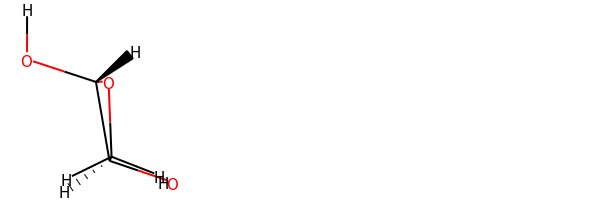

AlkEthOH_r0
     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
    0.1466   -0.6972   -1.2190 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1072   -0.7754    0.3061 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.1521    0.7339    0.2375 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.0894    0.7465   -1.1920 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.3221   -1.1878    0.9520 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4710    1.1671    0.6094 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.0701   -1.0576   -1.6805 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7173   -1.1199   -1.7408 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7451   -1.3515    0.6836 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.6019    1.3396    0.7541 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.1323   -1.1855    1.8998 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4701    2.1287    0.5135 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  4  1  0
  2  3  1  0
  2  5  1  0
  3  4  1  0
  3  6  1  0
  1  7

In [32]:
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/AlkEthOH_test_filt1_tripos.mol2"
ff_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/forcefield/smirnoff99Frosst.ffxml"
# mol_filename = "/home/shuzhe/Documents/openforcefield/openforcefield/data/molecules/MiniDrugBank_tripos.mol2"
mol = Chem.MolFromMol2File(mol_filename, sanitize = True, removeHs = False)
x = Draw.MolsToGridImage([mol])
display(x)

print Chem.MolToMolBlock(mol)
positions_rdk = extractPositionsFromRDKMol(mol)
#print positions

# atoms = mol.GetAtoms()
# print atoms[0].GetPropsAsDict()
# #print list(atoms[0].GetPropNames())
# atoms[0].SetDoubleProp("PartialCharge", 0.3)
# print atoms[0].GetPropsAsDict()["PartialCharge"]
# [float(a.GetPropsAsDict()["_TriposPartialCharge"]) if "_TriposPartialCharge" in a.GetPropsAsDict() else 0.0 for a in mol.GetAtoms()]

In [5]:

Chem.Draw.MolsToGridImage([mol],molsPerRow=1)


#print positions

# Load a SMIRNOFF small molecule forcefield for alkanes, ethers, and alcohols
forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
#forcefield = ForceField('/home/shuzhe/Documents/openforcefield/openforcefield/data/forcefield/Frosst_AlkEtOH_parmAtFrosst.ffxml')

# Create the OpenMM system
topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(mol)
system_rdk = forcefield.createSystem(topology_rdk, [mol])

#g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology, topology, system, system, positions)

In [6]:
# mol_filename = '/home/shuzhe/Documents/openforcefield/examples/SMIRNOFF_simulation/AlkEthOH_r51.mol2'
# mol_filename = '/home/shuzhe/Documents/openforcefield/openforcefield/data/molecules/AlkEthOH_test_filt1_tripos.mol2'

# Load molecule using OpenEye tools
mol = oechem.OEGraphMol()
ifs = oechem.oemolistream(mol_filename)
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
ifs.SetFlavor( oechem.OEFormat_MOL2, flavor)
oechem.OEReadMolecule(ifs, mol )
oechem.OETriposAtomNames(mol)

# Get positions in OpenMM-compatible format
positions_oe = extractPositionsFromOEMol(mol)
#print positions

# Load a SMIRNOFF small molecule forcefield for alkanes, ethers, and alcohols
forcefield = smirnoff.forcefield.ForceField(ff_filename)
#forcefield = ForceField('/home/shuzhe/Documents/openforcefield/openforcefield/data/forcefield/Frosst_AlkEtOH_parmAtFrosst.ffxml')

# Create the OpenMM system
topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(mol)
system_oe = forcefield.createSystem(topology_oe, [mol])

g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, skip_assert = True)






Num (type) 	 Num (type) 	 Num (type) 	 Num (type) 	 per 	 phase 	 k0
  1 ( C2)-   0 ( C1)- 	 3 ( O1)- 	   2 ( C3)- 	 3.000000 	 0.000000 	 1.602472 
  1 ( C2)-   0 ( C1)- 	 3 ( O1)- 	   2 ( C3)- 	 2.000000 	 180.000000 	 0.418400 
  4 ( O2)-   1 ( C2)- 	 2 ( C3)- 	   5 ( O3)- 	 3.000000 	 0.000000 	 0.602496 
  4 ( O2)-   1 ( C2)- 	 2 ( C3)- 	   5 ( O3)- 	 2.000000 	 0.000000 	 4.916200 
  5 ( O3)-   2 ( C3)- 	 1 ( C2)- 	   8 ( H3)- 	 3.000000 	 0.000000 	 0.000000 
  5 ( O3)-   2 ( C3)- 	 1 ( C2)- 	   8 ( H3)- 	 1.000000 	 0.000000 	 1.046000 
  0 ( C1)-   1 ( C2)- 	 2 ( C3)- 	   5 ( O3)- 	 3.000000 	 0.000000 	 0.652704 
  8 ( H3)-   1 ( C2)- 	 4 ( O2)- 	  10 ( H5)- 	 3.000000 	 0.000000 	 0.697333 
  4 ( O2)-   1 ( C2)- 	 0 ( C1)- 	   6 ( H1)- 	 3.000000 	 0.000000 	 0.000000 
  4 ( O2)-   1 ( C2)- 	 0 ( C1)- 	   6 ( H1)- 	 1.000000 	 0.000000 	 1.046000 
  8 ( H3)-   1 ( C2)- 	 2 ( C3)- 	   9 ( H4)- 	 3.000000 	 0.000000 	 0.627600 
  2 ( C3)-   1 ( C2)- 	 4 ( O2)- 	  10 ( H5)- 	 3

In [35]:
def compare_energies(rdkmol, oemol):
    if rdkmol == None:
        print "RDK parsing error"
        return
    positions_rdk = extractPositionsFromRDKMol(rdkmol)
    forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
    topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(rdkmol)
    system_rdk = forcefield.createSystem(topology_rdk, [rdkmol])
    
    positions_oe = extractPositionsFromOEMol(oemol)
    forcefield = smirnoff.forcefield.ForceField(ff_filename)
    topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(oemol)
    system_oe = forcefield.createSystem(topology_oe, [oemol])

    g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, verbose = False,skip_assert = True)
    for i in g1:
        print g1[i] == g2[i]
    print e1, e2
    print

#mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "openforcefield/data/molecules/zinc-subset-tripos.mol2.gz"
mol_filename = "/home/shuzhe/Documents/zinc-subset-tripos.mol2"
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/DrugBank_tripos.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
istream.SetFlavor( oechem.OEFormat_MOL2, flavor)
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oechem.OETriposAtomNames(mol)
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()

counter = 0
for mol2 in RetrieveMol2Block(open(mol_filename, "r")):
    rdkmol = Chem.MolFromMol2Block(mol2,  removeHs = False)
    print  Chem.MolToMolBlock(rdkmol)[0:20]

    compare_energies(rdkmol, oemols_tripos[counter])
    counter += 1
    


DrugBank_2
     RDKi
True
False
True
False
1368.04857779 kJ/mol 1428.85587277 kJ/mol

DrugBank_7
     RDKi
True
False
True
False
488.972464753 kJ/mol 579.018316362 kJ/mol

DrugBank_8
     RDKi
True
False
True
False
97.5603096422 kJ/mol 129.449228076 kJ/mol

DrugBank_11
     RDK
True
True
True
True
121.842875784 kJ/mol 121.842875784 kJ/mol

DrugBank_13
     RDK
True
True
True
True
50.5439776971 kJ/mol 50.5439776971 kJ/mol

DrugBank_14
     RDK
True
False
True
False
54.0710739118 kJ/mol 83.2662545095 kJ/mol

DrugBank_15
     RDK
True
True
True
True
408.129450328 kJ/mol 408.129450328 kJ/mol

DrugBank_16
     RDK
True
True
True
True
45.5996088922 kJ/mol 45.5996088922 kJ/mol

DrugBank_17
     RDK
True
True
True
True
82.3495944747 kJ/mol 82.3495944747 kJ/mol

DrugBank_19
     RDK
True
True
True
True
171.97016852 kJ/mol 171.97016852 kJ/mol

DrugBank_20
     RDK
True
True
True
True
76.2124292582 kJ/mol 76.2124292582 kJ/mol

DrugBank_21
     RDK
True
True
True
True
58.4385328062 kJ/mol 58.43853

True
False
True
False
516.967227334 kJ/mol 583.19312418 kJ/mol

DrugBank_138
     RD
True
False
True
False
266.453733879 kJ/mol 325.978567783 kJ/mol

DrugBank_140
     RD
True
False
True
False
307.943879122 kJ/mol 340.949680764 kJ/mol

DrugBank_141
     RD
True
True
True
True
497.656198762 kJ/mol 497.656198762 kJ/mol

DrugBank_142
     RD
True
False
True
False
80.9910979228 kJ/mol 139.39013469 kJ/mol

DrugBank_143
     RD
True
False
True
False
612.14733034 kJ/mol 671.124528778 kJ/mol

DrugBank_144
     RD
True
False
True
False
194.130029651 kJ/mol 257.739307442 kJ/mol

DrugBank_145
     RD
True
True
True
True
594.323005793 kJ/mol 594.323005793 kJ/mol

DrugBank_146
     RD
True
False
True
False
307.348143889 kJ/mol 337.748919701 kJ/mol

DrugBank_147
     RD
True
False
True
False
100.843213098 kJ/mol 159.206210354 kJ/mol

DrugBank_148
     RD
True
False
True
False
346.15652891 kJ/mol 376.142737376 kJ/mol

DrugBank_149
     RD
True
False
True
False
270.700961196 kJ/mol 379.430053986 kJ/mo

True
False
True
False
342.735700979 kJ/mol 374.199191178 kJ/mol

DrugBank_269
     RD
True
True
True
True
548.111366665 kJ/mol 548.111366665 kJ/mol

DrugBank_271
     RD
True
False
True
True
212.354690893 kJ/mol 236.464489885 kJ/mol

DrugBank_273
     RD
True
False
True
False
67.8430447697 kJ/mol 119.89586875 kJ/mol

DrugBank_275
     RD
True
False
True
False
110.263024083 kJ/mol 206.032159799 kJ/mol

DrugBank_276
     RD
True
False
True
False
353.561002951 kJ/mol 411.645752936 kJ/mol

DrugBank_278
     RD
True
False
True
False
33.0943556876 kJ/mol 62.3043376124 kJ/mol

DrugBank_279
     RD
True
True
True
True
163.503130656 kJ/mol 163.503130656 kJ/mol

DrugBank_284
     RD
True
True
True
True
755.660343008 kJ/mol 755.660343008 kJ/mol

DrugBank_286
     RD
True
True
True
True
527.42700753 kJ/mol 527.42700753 kJ/mol

DrugBank_287
     RD
True
False
True
False
62.8537376243 kJ/mol 92.0656812222 kJ/mol

DrugBank_288
     RD
True
False
True
False
249.499827666 kJ/mol 334.507356413 kJ/mol

D

True
False
True
False
126.943905666 kJ/mol 191.310021006 kJ/mol

DrugBank_397
     RD
True
False
True
False
118.304649894 kJ/mol 176.669141353 kJ/mol

DrugBank_398
     RD
True
True
True
True
1107.28169752 kJ/mol 1107.28169752 kJ/mol

DrugBank_400
     RD
True
True
True
True
53.007532087 kJ/mol 53.007532087 kJ/mol

DrugBank_401
     RD
True
False
True
False
156.597234409 kJ/mol 187.251524902 kJ/mol

DrugBank_404
     RD
True
True
True
True
565.21459059 kJ/mol 565.21459059 kJ/mol

DrugBank_405
     RD
True
False
True
False
190.64224022 kJ/mol 219.264747884 kJ/mol

DrugBank_406
     RD
True
False
True
False
472.500009444 kJ/mol 501.675054254 kJ/mol

DrugBank_409
     RD
True
False
True
False
188.407260874 kJ/mol 280.537346382 kJ/mol

DrugBank_410
     RD
True
True
True
True
220.618841339 kJ/mol 220.618841339 kJ/mol

DrugBank_412
     RD
True
False
True
False
137.204391772 kJ/mol 217.528342012 kJ/mol

DrugBank_414
     RD
True
False
True
False
191.588731678 kJ/mol 258.369386373 kJ/mol

Dr

True
False
True
False
195.3265954 kJ/mol 254.638097079 kJ/mol

DrugBank_536
     RD
True
True
True
True
374.616976694 kJ/mol 374.616976694 kJ/mol

DrugBank_539
     RD
True
False
True
False
156.706238012 kJ/mol 189.50827464 kJ/mol

DrugBank_540
     RD
True
True
True
True
5.87329660302 kJ/mol 5.87329660302 kJ/mol

DrugBank_541
     RD
True
False
True
False
531.854087509 kJ/mol 561.084078216 kJ/mol

DrugBank_542
     RD
True
False
True
False
393.73385555 kJ/mol 423.881898586 kJ/mol

DrugBank_543
     RD
True
False
True
False
194.271611198 kJ/mol 224.391291337 kJ/mol

DrugBank_546
     RD
True
True
True
True
56.0697243589 kJ/mol 56.0697243589 kJ/mol

DrugBank_549
     RD
True
False
True
False
201.810368853 kJ/mol 265.527818577 kJ/mol

DrugBank_550
     RD
True
True
True
True
598.2013868 kJ/mol 598.2013868 kJ/mol

DrugBank_551
     RD
True
False
True
False
173.71092089 kJ/mol 232.530145838 kJ/mol

DrugBank_552
     RD
True
False
True
False
312.889492185 kJ/mol 329.509346087 kJ/mol

DrugBa

True
False
True
False
123.197636388 kJ/mol 151.866014604 kJ/mol

DrugBank_666
     RD
True
False
True
False
74.1714159384 kJ/mol 103.34702043 kJ/mol

DrugBank_668
     RD
True
False
True
False
563.350511045 kJ/mol 629.270217474 kJ/mol

DrugBank_669
     RD
True
False
True
False
490.923659704 kJ/mol 521.025740219 kJ/mol

DrugBank_670
     RD
True
False
True
False
151.043294921 kJ/mol 214.713967784 kJ/mol

DrugBank_671
     RD
True
True
True
True
161.1502037 kJ/mol 161.1502037 kJ/mol

DrugBank_672
     RD
True
True
True
True
176.580918564 kJ/mol 176.580918564 kJ/mol

DrugBank_673
     RD
True
False
True
False
80.9310146502 kJ/mol 133.848551477 kJ/mol

DrugBank_674
     RD
True
False
True
True
148.535159633 kJ/mol 162.48593234 kJ/mol

DrugBank_675
     RD
True
True
True
True
480.570703243 kJ/mol 480.570703243 kJ/mol

DrugBank_676
     RD
True
True
True
True
139.903509421 kJ/mol 139.903509421 kJ/mol

DrugBank_677
     RD
True
False
True
False
92.8978355461 kJ/mol 149.812909826 kJ/mol

Drug

True
True
True
True
651.413963392 kJ/mol 651.413963392 kJ/mol

DrugBank_794
     RD
True
True
True
True
151.206727139 kJ/mol 151.206727139 kJ/mol

DrugBank_795
     RD
True
False
True
False
187.491529262 kJ/mol 255.097288265 kJ/mol

DrugBank_796
     RD
True
False
True
False
133.18497242 kJ/mol 193.952355696 kJ/mol

DrugBank_798
     RD
True
True
True
True
117.19886651 kJ/mol 117.19886651 kJ/mol

DrugBank_799
     RD
True
True
True
True
143.469189007 kJ/mol 143.469189007 kJ/mol

DrugBank_800
     RD
True
True
True
True
393.631455949 kJ/mol 393.631455949 kJ/mol

DrugBank_801
     RD
True
False
True
False
513.866518058 kJ/mol 543.6241496 kJ/mol

DrugBank_802
     RD
True
True
True
True
196.913671784 kJ/mol 196.913671784 kJ/mol

DrugBank_803
     RD
True
False
True
False
226.778103328 kJ/mol 262.754368146 kJ/mol

DrugBank_804
     RD
True
False
True
False
1332.32243876 kJ/mol 1360.16859508 kJ/mol

DrugBank_805
     RD
True
False
True
False
119.406858885 kJ/mol 148.625878792 kJ/mol

DrugBa

True
True
True
True
132.67158838 kJ/mol 132.67158838 kJ/mol

DrugBank_925
     RD
True
False
True
False
871.183598922 kJ/mol 924.960183941 kJ/mol

DrugBank_926
     RD
True
True
True
True
430.105979263 kJ/mol 430.105979263 kJ/mol

DrugBank_927
     RD
True
True
True
True
717.139458346 kJ/mol 717.139458346 kJ/mol

DrugBank_928
     RD
True
False
True
False
543.827476164 kJ/mol 586.398401418 kJ/mol

DrugBank_929
     RD
True
False
True
False
845.921278561 kJ/mol 877.931004195 kJ/mol

DrugBank_931
     RD
True
False
True
False
400.735419747 kJ/mol 465.344873273 kJ/mol

DrugBank_932
     RD
True
False
True
False
497.945604072 kJ/mol 531.159690066 kJ/mol

DrugBank_934
     RD
True
True
True
True
75.4444818317 kJ/mol 75.4444818317 kJ/mol

DrugBank_936
     RD
True
True
True
True
66.7487974004 kJ/mol 66.7487974004 kJ/mol

DrugBank_938
     RD
True
False
True
False
160.581046684 kJ/mol 192.029180359 kJ/mol

DrugBank_939
     RD
True
False
True
False
539.438563928 kJ/mol 570.159386419 kJ/mol

D

True
False
True
False
559.279517103 kJ/mol 589.381597618 kJ/mol

DrugBank_1075
     R
True
True
True
True
380.310545555 kJ/mol 380.310545555 kJ/mol

DrugBank_1077
     R
True
False
True
False
295.690391302 kJ/mol 413.940863713 kJ/mol

DrugBank_1078
     R
True
False
True
False
867.37401835 kJ/mol 899.396148028 kJ/mol

DrugBank_1080
     R
True
True
True
True
334.225284812 kJ/mol 334.225284812 kJ/mol

DrugBank_1082
     R
True
False
True
False
191.436619335 kJ/mol 255.475871286 kJ/mol

DrugBank_1083
     R
True
False
True
False
234.53330268 kJ/mol 274.154881441 kJ/mol

DrugBank_1084
     R
True
True
True
True
132.335806339 kJ/mol 132.335806339 kJ/mol

DrugBank_1085
     R
True
False
True
False
107.710081265 kJ/mol 163.418314611 kJ/mol

DrugBank_1086
     R
True
False
True
False
389.419800627 kJ/mol 420.888809444 kJ/mol

DrugBank_1087
     R
True
False
True
False
198.835772904 kJ/mol 226.141471263 kJ/mol

DrugBank_1088
     R
True
False
True
False
146.4666043 kJ/mol 175.918657494 kJ/mol


True
True
True
True
589.139852797 kJ/mol 589.139852797 kJ/mol

DrugBank_1207
     R
True
False
True
False
482.822224024 kJ/mol 545.454012892 kJ/mol

DrugBank_1208
     R
True
True
True
True
99.0580745642 kJ/mol 99.0580745642 kJ/mol

DrugBank_1209
     R
True
False
True
False
247.756222907 kJ/mol 294.509369895 kJ/mol

DrugBank_1210
     R
True
False
True
False
169.67942395 kJ/mol 232.087583114 kJ/mol

DrugBank_1212
     R
True
True
True
True
906.776805994 kJ/mol 906.776805994 kJ/mol

DrugBank_1213
     R
True
True
True
True
1076.82708063 kJ/mol 1076.82708063 kJ/mol

DrugBank_1214
     R
True
False
True
False
56.2273507636 kJ/mol 85.4030120076 kJ/mol

DrugBank_1215
     R
True
False
True
False
124.745573565 kJ/mol 193.699165303 kJ/mol

DrugBank_1216
     R
True
False
True
False
107.191898431 kJ/mol 136.394318056 kJ/mol

DrugBank_1217
     R
True
False
True
False
56.2273507636 kJ/mol 85.4030120076 kJ/mol

DrugBank_1218
     R
True
False
True
False
165.920945369 kJ/mol 230.700883215 kJ/mol

True
False
True
False
144.475338131 kJ/mol 173.655086999 kJ/mol

DrugBank_1351
     R
True
False
True
False
59.8013816594 kJ/mol 94.5905222214 kJ/mol

DrugBank_1352
     R
True
True
True
True
455.407945485 kJ/mol 455.407945485 kJ/mol

DrugBank_1353
     R
True
False
True
False
157.767322508 kJ/mol 217.424763773 kJ/mol

DrugBank_1354
     R
True
True
True
True
18.964242412 kJ/mol 18.964242412 kJ/mol

DrugBank_1355
     R
True
True
True
True
601.751238785 kJ/mol 601.751238785 kJ/mol

DrugBank_1356
     R
True
False
True
False
315.318308659 kJ/mol 342.127116351 kJ/mol

DrugBank_1358
     R
True
False
True
False
116.547298719 kJ/mol 174.985842577 kJ/mol

DrugBank_1359
     R
True
False
True
False
338.708240054 kJ/mol 375.202615331 kJ/mol

DrugBank_1360
     R
True
True
True
True
577.508960929 kJ/mol 577.508960929 kJ/mol

DrugBank_1363
     R
True
False
True
False
334.67289691 kJ/mol 391.614196833 kJ/mol

DrugBank_1364
     R
True
False
True
False
49.5127623357 kJ/mol 78.6990873465 kJ/mol



True
True
True
True
39.9943281965 kJ/mol 39.9943281965 kJ/mol

DrugBank_1475
     R
True
True
True
True
72.9512316092 kJ/mol 72.9512316092 kJ/mol

DrugBank_1478
     R
True
True
True
True
53.4040040198 kJ/mol 53.4040040198 kJ/mol

DrugBank_1479
     R
True
True
True
True
557.41113919 kJ/mol 557.41113919 kJ/mol

DrugBank_1480
     R
True
True
True
True
14.7287485116 kJ/mol 14.7287485116 kJ/mol

DrugBank_1481
     R
True
False
True
False
31.4462817366 kJ/mol 64.5968673401 kJ/mol

DrugBank_1483
     R
True
False
True
False
72.2171305536 kJ/mol 101.392766636 kJ/mol

DrugBank_1485
     R
True
True
True
True
179.385151201 kJ/mol 179.385151201 kJ/mol

DrugBank_1486
     R
True
True
True
True
462.891467239 kJ/mol 462.891467239 kJ/mol

DrugBank_1487
     R
True
True
True
True
85.1384910093 kJ/mol 85.1384910093 kJ/mol

DrugBank_1489
     R
True
False
True
False
31.2704494163 kJ/mol 60.4461099669 kJ/mol

DrugBank_1490
     R
True
False
True
False
256.787581152 kJ/mol 315.127318549 kJ/mol

DrugBan

True
True
True
True
26.0485092743 kJ/mol 26.0485092743 kJ/mol

DrugBank_1597
     R
True
False
True
False
735.135408782 kJ/mol 777.741164388 kJ/mol

DrugBank_1598
     R
True
False
True
False
372.195510642 kJ/mol 447.092144761 kJ/mol

DrugBank_1600
     R
True
True
True
True
59.0448634963 kJ/mol 59.0448634963 kJ/mol

DrugBank_1602
     R
True
False
True
False
185.008956239 kJ/mol 244.675173792 kJ/mol

DrugBank_1604
     R
True
False
True
False
279.817210876 kJ/mol 357.729518485 kJ/mol

DrugBank_1605
     R
True
True
True
True
73.8867449484 kJ/mol 73.8867449484 kJ/mol

DrugBank_1606
     R
True
False
True
False
103.842818612 kJ/mol 162.919309607 kJ/mol

DrugBank_1608
     R
True
True
True
True
132.63845875 kJ/mol 132.63845875 kJ/mol

DrugBank_1609
     R
True
True
True
True
85.139212978 kJ/mol 85.139212978 kJ/mol

DrugBank_1611
     R
True
True
True
True
315.591271687 kJ/mol 315.591271687 kJ/mol

DrugBank_1612
     R
True
True
True
True
20.6771086687 kJ/mol 20.6771086687 kJ/mol

DrugBan

True
True
True
True
506.685925326 kJ/mol 506.685925326 kJ/mol

DrugBank_1716
     R
True
False
True
False
104.271237952 kJ/mol 133.446483335 kJ/mol

DrugBank_1717
     R
True
False
True
False
82445.8159748 kJ/mol 82474.9915793 kJ/mol

DrugBank_1718
     R
True
False
True
False
365.524938029 kJ/mol 394.729265115 kJ/mol

DrugBank_1719
     R
True
True
True
True
722.679973253 kJ/mol 722.679973253 kJ/mol

DrugBank_1720
     R
True
True
True
True
254.809271341 kJ/mol 254.809271341 kJ/mol

DrugBank_1721
     R
True
False
True
False
330.034136351 kJ/mol 377.331918214 kJ/mol

DrugBank_1722
     R
True
True
True
True
15.1263061326 kJ/mol 15.1263061326 kJ/mol

DrugBank_1723
     R
True
False
True
False
725.199545033 kJ/mol 767.749902786 kJ/mol

DrugBank_1724
     R
True
True
True
True
141.431912841 kJ/mol 141.431912841 kJ/mol

DrugBank_1725
     R
True
True
True
True
139.433398394 kJ/mol 139.433398394 kJ/mol

DrugBank_1726
     R
True
True
True
True
609.885084046 kJ/mol 609.885084046 kJ/mol

Dru

True
False
True
False
115.187860638 kJ/mol 147.256205281 kJ/mol

DrugBank_1839
     R
True
True
True
True
795.64114137 kJ/mol 795.64114137 kJ/mol

DrugBank_1840
     R
True
True
True
True
111.026252904 kJ/mol 111.026252904 kJ/mol

DrugBank_1841
     R
True
True
True
True
82125.3683246 kJ/mol 82125.3683246 kJ/mol

DrugBank_1842
     R
True
False
True
False
110.834339138 kJ/mol 138.386260547 kJ/mol

DrugBank_1843
     R
True
False
True
False
159.621872021 kJ/mol 188.812218428 kJ/mol

DrugBank_1844
     R
True
True
True
True
462.458671339 kJ/mol 462.458671339 kJ/mol

DrugBank_1845
     R
True
False
True
False
598.636635792 kJ/mol 641.218561197 kJ/mol

DrugBank_1846
     R
True
True
True
True
135.692260931 kJ/mol 135.692260931 kJ/mol

DrugBank_1847
     R
True
True
True
True
120.119285987 kJ/mol 120.119285987 kJ/mol

DrugBank_1849
     R
True
False
True
False
243.467369922 kJ/mol 367.457224949 kJ/mol

DrugBank_1850
     R
True
False
True
False
495.717349809 kJ/mol 538.306124107 kJ/mol

Dru

True
True
True
True
71.4115997304 kJ/mol 71.4115997304 kJ/mol

DrugBank_1957
     R
True
False
True
False
368.96748979 kJ/mol 398.14420179 kJ/mol

DrugBank_1958
     R
True
False
True
False
162.934414241 kJ/mol 225.385342639 kJ/mol

DrugBank_1959
     R
True
False
True
False
189.704356598 kJ/mol 249.110503099 kJ/mol

DrugBank_1960
     R
True
False
True
False
372.557177462 kJ/mol 405.798237355 kJ/mol

DrugBank_1961
     R
True
False
True
False
98.9627806286 kJ/mol 160.306017726 kJ/mol

DrugBank_1962
     R
True
True
True
True
169.6120377 kJ/mol 169.6120377 kJ/mol

DrugBank_1963
     R
True
False
True
False
316.302633684 kJ/mol 475.424063745 kJ/mol

DrugBank_1964
     R
True
True
True
True
76.2311801215 kJ/mol 76.2311801215 kJ/mol

DrugBank_1965
     R
True
True
True
True
86.1280787131 kJ/mol 86.1280787131 kJ/mol

DrugBank_1966
     R
True
True
True
True
700.699464402 kJ/mol 700.699464402 kJ/mol

DrugBank_1968
     R
True
False
True
False
18.6401960106 kJ/mol 47.8157913956 kJ/mol

DrugB

True
False
True
False
356.987422234 kJ/mol 444.577772201 kJ/mol

DrugBank_2066
     R
True
True
True
True
68.1350008666 kJ/mol 68.1350008666 kJ/mol

DrugBank_2068
     R
True
False
True
False
219.595754883 kJ/mol 280.749647209 kJ/mol

DrugBank_2069
     R
True
True
True
True
47.7343366455 kJ/mol 47.7343366455 kJ/mol

DrugBank_2070
     R
True
False
True
False
605.65294782 kJ/mol 656.789455184 kJ/mol

DrugBank_2072
     R
True
True
True
True
77.4241437855 kJ/mol 77.4241437855 kJ/mol

DrugBank_2073
     R
True
True
True
True
168.837159551 kJ/mol 168.837159551 kJ/mol

DrugBank_2074
     R
True
True
True
True
44292.3055121 kJ/mol 44292.3055121 kJ/mol

DrugBank_2076
     R
True
True
True
False
199.487533053 kJ/mol 200.528476723 kJ/mol

DrugBank_2077
     R
True
True
True
True
37.4749202767 kJ/mol 37.4749202767 kJ/mol

DrugBank_2079
     R
True
False
True
False
329.368014111 kJ/mol 358.55038991 kJ/mol

DrugBank_2081
     R
True
False
True
False
74.0355295159 kJ/mol 129.82200138 kJ/mol

DrugB

True
False
True
False
157.715814798 kJ/mol 215.267747557 kJ/mol

DrugBank_2185
     R
True
False
True
False
43.2286875785 kJ/mol 72.4042920701 kJ/mol

DrugBank_2186
     R
True
True
True
True
175.126252225 kJ/mol 175.126252225 kJ/mol

DrugBank_2187
     R
True
False
True
False
170.54793926 kJ/mol 233.844586559 kJ/mol

DrugBank_2188
     R
True
True
True
True
102.059684494 kJ/mol 102.059684494 kJ/mol

DrugBank_2190
     R
True
True
True
True
112.360332421 kJ/mol 112.360332421 kJ/mol

DrugBank_2191
     R
True
True
True
True
162.0692387 kJ/mol 162.0692387 kJ/mol

DrugBank_2192
     R
True
True
True
True
169.876023708 kJ/mol 169.876023708 kJ/mol

DrugBank_2193
     R
True
False
True
False
566.805215892 kJ/mol 595.87262465 kJ/mol

DrugBank_2195
     R
True
True
True
True
162.749703045 kJ/mol 162.749703045 kJ/mol

DrugBank_2197
     R
True
False
True
False
308.626600992 kJ/mol 341.787087869 kJ/mol

DrugBank_2198
     R
True
False
True
False
233.920295561 kJ/mol 298.810355471 kJ/mol

DrugBan

True
True
True
True
550.809396803 kJ/mol 550.809396803 kJ/mol

DrugBank_2311
     R
True
False
True
False
124.693964313 kJ/mol 153.902847061 kJ/mol

DrugBank_2312
     R
True
False
True
False
125.989860966 kJ/mol 155.180890913 kJ/mol

DrugBank_2313
     R
True
False
True
False
94.1776787438 kJ/mol 126.252992595 kJ/mol

DrugBank_2314
     R
True
True
True
True
173.449501822 kJ/mol 173.449501822 kJ/mol

DrugBank_2316
     R
True
False
True
False
359.713019579 kJ/mol 388.904998117 kJ/mol

DrugBank_2317
     R
True
False
True
False
166.141786869 kJ/mol 210.718193839 kJ/mol

DrugBank_2318
     R
True
True
True
True
126.833123266 kJ/mol 126.833123266 kJ/mol

DrugBank_2319
     R
True
True
True
True
20.1288831195 kJ/mol 20.1288831195 kJ/mol

DrugBank_2320
     R
True
False
True
False
575.657853239 kJ/mol 618.239778645 kJ/mol

DrugBank_2321
     R
True
False
True
False
83.7890622763 kJ/mol 113.031100435 kJ/mol

DrugBank_2322
     R
True
True
True
True
101.948061727 kJ/mol 101.948061727 kJ/mol


True
False
True
False
249.094776913 kJ/mol 283.598413403 kJ/mol

DrugBank_2420
     R
True
True
True
True
50.1397672641 kJ/mol 50.1397672641 kJ/mol

DrugBank_2421
     R
True
True
True
True
537.489795587 kJ/mol 537.489795587 kJ/mol

DrugBank_2422
     R
True
False
True
False
465.085105376 kJ/mol 553.390116497 kJ/mol

DrugBank_2425
     R
True
False
True
False
210.406021011 kJ/mol 243.660756099 kJ/mol

DrugBank_2426
     R
True
True
True
True
146.657549689 kJ/mol 146.657549689 kJ/mol

DrugBank_2427
     R
True
True
True
True
124.903770399 kJ/mol 124.903770399 kJ/mol

DrugBank_2428
     R
True
True
True
True
174.171479819 kJ/mol 174.171479819 kJ/mol

DrugBank_2429
     R
True
False
True
False
613.020316316 kJ/mol 642.201299784 kJ/mol

DrugBank_2431
     R
True
True
True
True
110.124088187 kJ/mol 110.124088187 kJ/mol

DrugBank_2432
     R
True
True
True
True
57.1577510896 kJ/mol 57.1577510896 kJ/mol

DrugBank_2434
     R
True
False
True
False
109.538603295 kJ/mol 137.920082294 kJ/mol

Dru

True
True
True
True
151.184585014 kJ/mol 151.184585014 kJ/mol

DrugBank_2537
     R
True
False
True
False
600.734743349 kJ/mol 643.283393811 kJ/mol

DrugBank_2538
     R
True
True
True
True
36.5254808783 kJ/mol 36.5254808783 kJ/mol

DrugBank_2539
     R
True
True
True
True
272.483917167 kJ/mol 272.483917167 kJ/mol

DrugBank_2540
     R
True
True
True
True
79.2523481218 kJ/mol 79.2523481218 kJ/mol

DrugBank_2541
     R
True
False
True
False
230.227744857 kJ/mol 315.862322376 kJ/mol

DrugBank_2542
     R
True
False
True
False
253.316994699 kJ/mol 279.873502585 kJ/mol

DrugBank_2543
     R
False
False
True
False
301.099119834 kJ/mol 372.135607354 kJ/mol

DrugBank_2544
     R
True
True
True
True
442.074537353 kJ/mol 442.074537353 kJ/mol

DrugBank_2545
     R
True
True
True
True
488.432938933 kJ/mol 488.432938933 kJ/mol

DrugBank_2546
     R
True
True
True
True
347.995582858 kJ/mol 347.995582858 kJ/mol

DrugBank_2547
     R
True
True
True
True
477.404745374 kJ/mol 477.404745374 kJ/mol

Drug

True
False
True
False
50.9315074263 kJ/mol 80.1127770587 kJ/mol

DrugBank_2647
     R
True
True
True
True
63.4103412642 kJ/mol 63.4103412642 kJ/mol

DrugBank_2648
     R
True
False
True
False
90.8169177956 kJ/mol 121.730111922 kJ/mol

DrugBank_2649
     R
True
False
True
False
192.931652233 kJ/mol 222.138971116 kJ/mol

DrugBank_2650
     R
True
True
True
True
293.598512427 kJ/mol 293.598512427 kJ/mol

DrugBank_2651
     R
True
True
True
True
332.834415115 kJ/mol 332.834415115 kJ/mol

DrugBank_2652
     R
True
True
True
True
143.13365104 kJ/mol 143.13365104 kJ/mol

DrugBank_2653
     R
True
True
True
True
88.6167803835 kJ/mol 88.6167803835 kJ/mol

DrugBank_2654
     R
True
False
True
False
419.483603854 kJ/mol 452.625839621 kJ/mol

DrugBank_2655
     R
True
True
True
True
54.374731818 kJ/mol 54.374731818 kJ/mol

DrugBank_2656
     R
True
False
True
False
28.0669772747 kJ/mol 57.2426534077 kJ/mol

DrugBank_2657
     R
True
True
True
True
87.1564618334 kJ/mol 87.1564618334 kJ/mol

DrugBan

True
True
True
True
56.755372605 kJ/mol 56.755372605 kJ/mol

DrugBank_2763
     R
True
False
True
False
37.8867077373 kJ/mol 67.0477033411 kJ/mol

DrugBank_2764
     R
True
True
True
True
99.3338689008 kJ/mol 99.3338689008 kJ/mol

DrugBank_2765
     R
True
True
True
True
82.5809706192 kJ/mol 82.5809706192 kJ/mol

DrugBank_2766
     R
True
False
True
False
205.62530004 kJ/mol 263.523017892 kJ/mol

DrugBank_2767
     R
True
True
True
True
308.685574794 kJ/mol 308.685574794 kJ/mol

DrugBank_2768
     R
True
True
True
True
18.1723214072 kJ/mol 18.1723214072 kJ/mol

DrugBank_2769
     R
True
False
True
True
74.8466214841 kJ/mol 75.7954573649 kJ/mol

DrugBank_2770
     R
True
False
True
False
187.55297137 kJ/mol 214.955138364 kJ/mol

DrugBank_2771
     R
True
True
True
True
35405.4579134 kJ/mol 35405.4579134 kJ/mol

DrugBank_2772
     R
True
True
True
True
207.989452886 kJ/mol 207.989452886 kJ/mol

DrugBank_2773
     R
True
True
True
True
434.996711986 kJ/mol 434.996711986 kJ/mol

DrugBank_2

True
False
True
False
35.3225642217 kJ/mol 64.4979699656 kJ/mol

DrugBank_2876
     R
True
True
True
True
46.4941224899 kJ/mol 46.4941224899 kJ/mol

DrugBank_2877
     R
True
True
True
True
56.1611802486 kJ/mol 56.1611802486 kJ/mol

DrugBank_2878
     R
True
True
True
True
48.3900414943 kJ/mol 48.3900414943 kJ/mol

DrugBank_2879
     R
True
True
True
True
374.865842959 kJ/mol 374.865842959 kJ/mol

DrugBank_2880
     R
True
False
True
False
405.217227624 kJ/mol 447.745435875 kJ/mol

DrugBank_2881
     R
True
False
True
False
79.1187243642 kJ/mol 130.405602467 kJ/mol

DrugBank_2882
     R
True
True
True
True
151.197983912 kJ/mol 151.197983912 kJ/mol

DrugBank_2884
     R
True
False
True
False
190.765562799 kJ/mol 241.987684997 kJ/mol

DrugBank_2885
     R
True
False
True
False
368.96748979 kJ/mol 398.14420179 kJ/mol

DrugBank_2886
     R
True
False
True
False
612.024782897 kJ/mol 654.556411094 kJ/mol

DrugBank_2887
     R
True
True
True
True
207.280594867 kJ/mol 207.280594867 kJ/mol

Dru

True
True
True
True
23.7158971998 kJ/mol 23.7158971998 kJ/mol

DrugBank_2992
     R
True
False
True
False
211.240992748 kJ/mol 261.127695959 kJ/mol

DrugBank_2994
     R
True
True
True
True
146.701642203 kJ/mol 146.701642203 kJ/mol

DrugBank_2995
     R
True
False
True
False
19.7199918529 kJ/mol 48.895636578 kJ/mol

DrugBank_2996
     R
True
True
True
True
81.3762528719 kJ/mol 81.3762528719 kJ/mol

DrugBank_2998
     R
True
False
True
False
145.108216672 kJ/mol 176.794240972 kJ/mol

DrugBank_2999
     R
True
False
False
False
63.8335901189 kJ/mol 75.326117887 kJ/mol

DrugBank_3001
     R
True
True
True
True
9.81917231603 kJ/mol 9.81917231603 kJ/mol

DrugBank_3002
     R
True
False
True
False
56.9028171569 kJ/mol 115.242255364 kJ/mol

DrugBank_3003
     R
True
True
True
True
71.8119401763 kJ/mol 71.8119401763 kJ/mol

DrugBank_3005
     R
True
False
True
False
558.281990886 kJ/mol 600.825370552 kJ/mol

DrugBank_3007
     R
True
False
True
False
354.161426511 kJ/mol 491.349493698 kJ/mol



True
True
True
True
316.595301184 kJ/mol 316.595301184 kJ/mol

DrugBank_3114
     R
True
False
True
False
95.0002969855 kJ/mol 153.392670078 kJ/mol

DrugBank_3116
     R
True
True
True
True
71.7988324673 kJ/mol 71.7988324673 kJ/mol

DrugBank_3117
     R
True
False
True
False
502.435665355 kJ/mol 627.685820515 kJ/mol

DrugBank_3118
     R
True
False
True
False
433.237295637 kJ/mol 462.427573685 kJ/mol

DrugBank_3120
     R
True
False
True
False
255.671152973 kJ/mol 314.015880598 kJ/mol

DrugBank_3122
     R
True
True
True
True
305.456664551 kJ/mol 305.456664551 kJ/mol

DrugBank_3123
     R
True
False
True
False
138.459130988 kJ/mol 257.501495272 kJ/mol

DrugBank_3126
     R
True
False
True
False
341.630335704 kJ/mol 433.798906683 kJ/mol

DrugBank_3127
     R
True
True
True
True
106.572697052 kJ/mol 106.572697052 kJ/mol

DrugBank_3128
     R
True
True
True
True
101.70440205 kJ/mol 101.70440205 kJ/mol

DrugBank_3129
     R
True
True
True
True
641.425729587 kJ/mol 641.425729587 kJ/mol

Dru

True
False
True
False
237.462714328 kJ/mol 299.084410113 kJ/mol

DrugBank_3228
     R
True
False
True
False
145.641526054 kJ/mol 174.881162191 kJ/mol

DrugBank_3229
     R
True
False
True
False
398.831378692 kJ/mol 447.167908806 kJ/mol

DrugBank_3230
     R
True
True
True
True
96.8539023552 kJ/mol 96.8539023552 kJ/mol

DrugBank_3231
     R
True
True
True
True
45.5532337697 kJ/mol 45.5532337697 kJ/mol

DrugBank_3232
     R
True
False
True
False
68.9115516543 kJ/mol 127.607986975 kJ/mol

DrugBank_3233
     R
True
False
True
False
140.4972256 kJ/mol 169.736118608 kJ/mol

DrugBank_3234
     R
True
True
True
True
76.487196773 kJ/mol 76.487196773 kJ/mol

DrugBank_3235
     R
True
False
True
False
89.7586200689 kJ/mol 152.085386288 kJ/mol

DrugBank_3236
     R
True
False
True
False
131.685068841 kJ/mol 236.61320982 kJ/mol

DrugBank_3237
     R
True
False
True
False
762.811663262 kJ/mol 792.000494147 kJ/mol

DrugBank_3240
     R
True
True
True
True
557.480485218 kJ/mol 557.480485218 kJ/mol

Dr

True
False
True
False
83.5989786087 kJ/mol 114.950531751 kJ/mol

DrugBank_3345
     R
True
True
True
True
697.28970631 kJ/mol 697.28970631 kJ/mol

DrugBank_3346
     R
True
True
True
True
90.976925371 kJ/mol 90.976925371 kJ/mol

DrugBank_3348
     R
True
False
True
False
556.092603481 kJ/mol 583.300299705 kJ/mol

DrugBank_3349
     R
True
False
True
False
56.8972912755 kJ/mol 86.0729613595 kJ/mol

DrugBank_3350
     R
True
False
True
False
130.860269319 kJ/mol 164.986439024 kJ/mol

DrugBank_3353
     R
True
True
True
True
7.96384124367 kJ/mol 7.96384124367 kJ/mol

DrugBank_3354
     R
True
True
True
True
67.3203657286 kJ/mol 67.3203657286 kJ/mol

DrugBank_3355
     R
True
False
True
False
510.52353204 kJ/mol 537.727366868 kJ/mol

DrugBank_3356
     R
True
True
True
True
167.556157134 kJ/mol 167.556157134 kJ/mol

DrugBank_3357
     R
True
False
True
False
297.152544042 kJ/mol 330.754215612 kJ/mol

DrugBank_3358
     R
True
True
True
True
79.9804297663 kJ/mol 79.9804297663 kJ/mol

DrugBa

True
False
True
False
54.4858423251 kJ/mol 83.6610877079 kJ/mol

DrugBank_3454
     R
True
False
True
False
210.203729364 kJ/mol 239.367059399 kJ/mol

DrugBank_3455
     R
True
True
True
True
52.6408754102 kJ/mol 52.6408754102 kJ/mol

DrugBank_3456
     R
True
True
True
True
3.01826142969 kJ/mol 3.01826142969 kJ/mol

DrugBank_3457
     R
True
False
True
False
162.349379464 kJ/mol 224.837913518 kJ/mol

DrugBank_3459
     R
True
True
True
True
472.334081255 kJ/mol 472.334081255 kJ/mol

DrugBank_3460
     R
True
True
True
True
75.3233433394 kJ/mol 75.3233433394 kJ/mol

DrugBank_3461
     R
True
False
True
False
75.033507035 kJ/mol 104.209164939 kJ/mol

DrugBank_3462
     R
True
False
True
False
558.275036131 kJ/mol 587.426735325 kJ/mol

DrugBank_3463
     R
True
True
True
False
594.474869753 kJ/mol 602.846404423 kJ/mol

DrugBank_3464
     R
True
False
True
False
148.450352663 kJ/mol 212.97004986 kJ/mol

DrugBank_3465
     R
True
True
True
True
152.183987169 kJ/mol 152.183987169 kJ/mol

Dr

True
True
True
True
153.901773346 kJ/mol 153.901773346 kJ/mol

DrugBank_3564
     R
True
False
True
False
540.063735725 kJ/mol 567.269616073 kJ/mol

DrugBank_3565
     R
True
True
True
True
97.7748820859 kJ/mol 97.7748820859 kJ/mol

DrugBank_3566
     R
True
True
True
True
66.5022964349 kJ/mol 66.5022964349 kJ/mol

DrugBank_3570
     R
True
True
True
True
158.453576664 kJ/mol 158.453576664 kJ/mol

DrugBank_3571
     R
True
False
True
False
665.399891992 kJ/mol 723.776775313 kJ/mol

DrugBank_3572
     R
True
True
True
True
221.36371656 kJ/mol 221.36371656 kJ/mol

DrugBank_3575
     R
True
True
True
True
116.246573716 kJ/mol 116.246573716 kJ/mol

DrugBank_3576
     R
True
True
True
True
66.6751644206 kJ/mol 66.6751644206 kJ/mol

DrugBank_3577
     R
True
True
True
True
287.943391575 kJ/mol 287.943391575 kJ/mol

DrugBank_3579
     R
True
True
True
True
593.707994232 kJ/mol 593.707994232 kJ/mol

DrugBank_3581
     R
True
False
True
False
86.4187343605 kJ/mol 117.818531134 kJ/mol

DrugBank_

True
False
True
False
51.1913704195 kJ/mol 86.2405896948 kJ/mol

DrugBank_3685
     R
True
True
True
True
264.758913203 kJ/mol 264.758913203 kJ/mol

DrugBank_3686
     R
True
True
True
True
55.7479785192 kJ/mol 55.7479785192 kJ/mol

DrugBank_3687
     R
True
False
True
False
143.353130656 kJ/mol 169.995613503 kJ/mol

DrugBank_3688
     R
True
True
True
True
91.8114701226 kJ/mol 91.8114701226 kJ/mol

DrugBank_3689
     R
True
True
True
True
216.919461994 kJ/mol 216.919461994 kJ/mol

DrugBank_3691
     R
True
True
True
True
86.4987168892 kJ/mol 86.4987168892 kJ/mol

DrugBank_3692
     R
True
False
True
False
323.951230241 kJ/mol 438.224360316 kJ/mol

DrugBank_3693
     R
True
True
True
True
362.403623078 kJ/mol 362.403623078 kJ/mol

DrugBank_3694
     R
True
True
True
True
850.219304278 kJ/mol 850.219304278 kJ/mol

DrugBank_3695
     R
True
True
True
True
123.287249706 kJ/mol 123.287249706 kJ/mol

DrugBank_3696
     R
True
False
True
False
851.404555337 kJ/mol 880.585177943 kJ/mol

DrugB

True
False
True
False
272.226033474 kJ/mol 386.28318136 kJ/mol

DrugBank_3805
     R
True
False
True
False
248.021136719 kJ/mol 283.739169472 kJ/mol

DrugBank_3806
     R
True
True
True
True
140.338331572 kJ/mol 140.338331572 kJ/mol

DrugBank_3807
     R
True
True
True
True
23.618647941 kJ/mol 23.618647941 kJ/mol

DrugBank_3808
     R
True
False
True
False
86.485716025 kJ/mol 115.712183403 kJ/mol

DrugBank_3809
     R
True
False
True
False
87.1057701759 kJ/mol 116.281429525 kJ/mol

DrugBank_3810
     R
True
False
True
False
176.1270578 kJ/mol 242.779270235 kJ/mol

DrugBank_3811
     R
True
False
True
False
97.9233507425 kJ/mol 161.908497731 kJ/mol

DrugBank_3812
     R
True
True
True
True
43.5483463782 kJ/mol 43.5483463782 kJ/mol

DrugBank_3813
     R
True
False
True
False
507.878103583 kJ/mol 537.399896928 kJ/mol

DrugBank_3815
     R
True
True
True
True
662.302397417 kJ/mol 662.302397417 kJ/mol

DrugBank_3816
     R
True
True
True
True
135.460968539 kJ/mol 135.460968539 kJ/mol

DrugB

True
True
True
True
50.5645056823 kJ/mol 50.5645056823 kJ/mol

DrugBank_3917
     R
True
True
True
True
225.720603307 kJ/mol 225.720603307 kJ/mol

DrugBank_3918
     R
True
True
True
True
151.976802605 kJ/mol 151.976802605 kJ/mol

DrugBank_3919
     R
True
False
True
False
42.4567583989 kJ/mol 93.0632624933 kJ/mol

DrugBank_3920
     R
True
False
True
False
487.703558213 kJ/mol 577.941541642 kJ/mol

DrugBank_3921
     R
True
False
True
False
167.729496144 kJ/mol 198.469585175 kJ/mol

DrugBank_3922
     R
True
True
True
True
65.8732079394 kJ/mol 65.8732079394 kJ/mol

DrugBank_3923
     R
True
True
True
True
73.3593573894 kJ/mol 73.3593573894 kJ/mol

DrugBank_3924
     R
True
True
True
True
69.0113555822 kJ/mol 69.0113555822 kJ/mol

DrugBank_3925
     R
True
True
True
True
519.630518554 kJ/mol 519.630518554 kJ/mol

DrugBank_3927
     R
True
True
True
True
3.55335006515 kJ/mol 3.55335006515 kJ/mol

DrugBank_3928
     R
True
False
True
False
207.849091967 kJ/mol 265.968019855 kJ/mol

DrugB

True
True
True
True
50.5638779862 kJ/mol 50.5638779862 kJ/mol

DrugBank_4039
     R
True
False
True
False
359.81596125 kJ/mol 388.949150616 kJ/mol

DrugBank_4040
     R
True
False
True
False
110.734224026 kJ/mol 137.349197916 kJ/mol

DrugBank_4041
     R
True
False
True
False
167.447665339 kJ/mol 256.314163959 kJ/mol

DrugBank_4042
     R
True
False
True
False
210.203112258 kJ/mol 239.388751476 kJ/mol

DrugBank_4043
     R
True
False
True
False
203.858403675 kJ/mol 270.7674597 kJ/mol

DrugBank_4044
     R
True
False
True
False
158.378390216 kJ/mol 252.917254624 kJ/mol

DrugBank_4045
     R
True
False
True
False
92.9602613211 kJ/mol 122.135936727 kJ/mol

DrugBank_4046
     R
True
True
True
True
101.814775018 kJ/mol 101.814775018 kJ/mol

DrugBank_4047
     R
True
False
True
False
331.576352647 kJ/mol 412.004582357 kJ/mol

DrugBank_4048
     R
True
False
True
False
50.5445104694 kJ/mol 97.1306074505 kJ/mol

DrugBank_4049
     R
True
False
True
False
628.345057061 kJ/mol 723.112402969 kJ/m

True
False
True
False
161.508134466 kJ/mol 251.689046869 kJ/mol

DrugBank_4147
     R
True
False
True
False
92.0676083664 kJ/mol 121.243217576 kJ/mol

DrugBank_4149
     R
True
False
True
False
20.7669291627 kJ/mol 49.9426017336 kJ/mol

DrugBank_4150
     R
True
False
True
False
257.846273822 kJ/mol 316.261000976 kJ/mol

DrugBank_4152
     R
True
False
True
False
345.807243053 kJ/mol 407.359289988 kJ/mol

DrugBank_4153
     R
True
True
True
True
16.0191677505 kJ/mol 16.0191677505 kJ/mol

DrugBank_4155
     R
True
True
True
True
50.0824026226 kJ/mol 50.0824026226 kJ/mol

DrugBank_4156
     R
True
False
True
False
610.797359508 kJ/mol 640.779981702 kJ/mol

DrugBank_4157
     R
True
True
True
True
326.320404039 kJ/mol 326.320404039 kJ/mol

DrugBank_4158
     R
True
True
True
True
177.556187921 kJ/mol 177.556187921 kJ/mol

DrugBank_4159
     R
True
False
True
False
68.6688104615 kJ/mol 103.139357295 kJ/mol

DrugBank_4160
     R
True
False
True
False
354.483546976 kJ/mol 395.434229067 kJ/mo

True
False
True
False
447.422233889 kJ/mol 486.118149435 kJ/mol

DrugBank_4258
     R
True
True
True
False
607.706524504 kJ/mol 608.501101164 kJ/mol

DrugBank_4259
     R
True
False
True
False
213.719103846 kJ/mol 306.79893859 kJ/mol

DrugBank_4260
     R
True
False
True
False
199.919819925 kJ/mol 229.149731853 kJ/mol

DrugBank_4261
     R
True
False
True
False
54.7176910086 kJ/mol 83.879912368 kJ/mol

DrugBank_4262
     R
True
True
True
True
84.1319241617 kJ/mol 84.1319241617 kJ/mol

DrugBank_4263
     R
True
False
True
False
318.309853407 kJ/mol 352.751372414 kJ/mol

DrugBank_4264
     R
True
False
True
False
208.951760614 kJ/mol 257.017286638 kJ/mol

DrugBank_4267
     R
True
False
True
False
144.624526958 kJ/mol 175.537650048 kJ/mol

DrugBank_4268
     R
True
False
True
False
128.097933631 kJ/mol 159.011074459 kJ/mol

DrugBank_4269
     R
True
False
True
False
399.365978887 kJ/mol 428.65093913 kJ/mol

DrugBank_4270
     R
True
False
True
False
192.488991465 kJ/mol 263.234230734 kJ/

True
False
True
False
120.024651406 kJ/mol 182.713064545 kJ/mol

DrugBank_4376
     R
True
False
True
True
1675.77478371 kJ/mol 1675.81241779 kJ/mol

DrugBank_4377
     R
True
False
True
False
705.290945104 kJ/mol 736.615621757 kJ/mol

DrugBank_4378
     R
True
False
True
False
98.3274608165 kJ/mol 173.573000716 kJ/mol

DrugBank_4381
     R
True
True
True
True
788.888544331 kJ/mol 788.888544331 kJ/mol

DrugBank_4383
     R
True
False
True
False
133.009997776 kJ/mol 231.24708003 kJ/mol

DrugBank_4384
     R
True
False
True
False
403.830356801 kJ/mol 502.297246443 kJ/mol

DrugBank_4387
     R
True
True
True
True
498.720874649 kJ/mol 498.720874649 kJ/mol

DrugBank_4389
     R
True
False
True
False
584.542554463 kJ/mol 665.975294732 kJ/mol

DrugBank_4390
     R
True
False
True
False
499.820672514 kJ/mol 531.261342484 kJ/mol

DrugBank_4391
     R
True
False
True
False
280.183752451 kJ/mol 367.599899681 kJ/mol

DrugBank_4392
     R
True
False
True
False
639.234367059 kJ/mol 762.871760219 kJ/

True
False
True
False
347.590874502 kJ/mol 423.284315576 kJ/mol

DrugBank_4508
     R
True
False
False
False
154.613225571 kJ/mol 537.406320885 kJ/mol

DrugBank_4510
     R
True
True
True
True
514.431244176 kJ/mol 514.431244176 kJ/mol

DrugBank_4511
     R
True
False
True
False
231.380247265 kJ/mol 324.828858271 kJ/mol

DrugBank_4513
     R
True
True
True
True
20.1096936642 kJ/mol 20.1096936642 kJ/mol

DrugBank_4514
     R
True
True
True
True
190.499932306 kJ/mol 190.499932306 kJ/mol

DrugBank_4515
     R
True
False
True
False
328.814258614 kJ/mol 359.702009964 kJ/mol

DrugBank_4516
     R
True
True
True
True
151.722819028 kJ/mol 151.722819028 kJ/mol

DrugBank_4517
     R
True
False
True
False
163.735087478 kJ/mol 196.695285893 kJ/mol

DrugBank_4518
     R
True
False
True
False
147.570994326 kJ/mol 205.943556809 kJ/mol

DrugBank_4519
     R
True
True
True
True
544.278411697 kJ/mol 544.278411697 kJ/mol

DrugBank_4520
     R
True
False
True
False
69.0105010596 kJ/mol 129.0936243 kJ/mol



True
False
True
False
323.156777058 kJ/mol 410.880309372 kJ/mol

DrugBank_4627
     R
True
True
True
True
865.149800604 kJ/mol 865.149800604 kJ/mol

DrugBank_4628
     R
True
False
True
False
224.212562489 kJ/mol 344.329722407 kJ/mol

DrugBank_4629
     R
True
False
True
False
660.682578012 kJ/mol 703.240597433 kJ/mol

DrugBank_4631
     R
True
False
True
False
96.7450157671 kJ/mol 125.922745177 kJ/mol

DrugBank_4633
     R
True
False
True
False
422.913373965 kJ/mol 452.053540412 kJ/mol

DrugBank_4634
     R
True
False
True
False
503.741169618 kJ/mol 595.230313645 kJ/mol

DrugBank_4636
     R
True
True
True
True
185.69962664 kJ/mol 185.69962664 kJ/mol

DrugBank_4637
     R
True
True
True
True
91.9137362864 kJ/mol 91.9137362864 kJ/mol

DrugBank_4638
     R
True
False
True
False
62.500463592 kJ/mol 91.7318915242 kJ/mol

DrugBank_4640
     R
True
False
True
False
423.640600189 kJ/mol 458.650546941 kJ/mol

DrugBank_4641
     R
True
False
True
False
165.636892154 kJ/mol 225.778968017 kJ/mol

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToMolBlock(NoneType)
did not match C++ signature:
    MolToMolBlock(RDKit::ROMol mol, bool includeStereo=False, int confId=-1, bool kekulize=True, bool forceV3000=False)

In [34]:
def compare_energies(rdkmol, oemol):
    if rdkmol == None:
        print "RDK parsing error"
        return
    positions_rdk = extractPositionsFromRDKMol(rdkmol)
    forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
    topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(rdkmol)
    system_rdk = forcefield.createSystem(topology_rdk, [rdkmol])
    
    positions_oe = extractPositionsFromOEMol(oemol)
    forcefield = smirnoff.forcefield.ForceField(ff_filename)
    topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(oemol)
    system_oe = forcefield.createSystem(topology_oe, [oemol])

    g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, verbose = False,skip_assert = True)
    if e1 == e2:
        return
#     for i in g1:
#         print g1[i] == g2[i]
#     print
    if not e1 < e2:
        print Chem.MolToMolBlock(rdkmol)
    

#mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "openforcefield/data/molecules/zinc-subset-tripos.mol2.gz"
mol_filename = "/home/shuzhe/Documents/zinc-subset-tripos.mol2"
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/DrugBank_tripos.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
istream.SetFlavor( oechem.OEFormat_MOL2, flavor)
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oechem.OETriposAtomNames(mol)
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()

counter = 0
for mol2 in RetrieveMol2Block(open(mol_filename, "r")):
    rdkmol = Chem.MolFromMol2Block(mol2,  removeHs = False)
    compare_energies(rdkmol, oemols_tripos[counter])
    counter += 1
    


AttributeError: 'ProperTorsionType' object has no attribute 'torsiontype'

In [13]:
def compare_energies(rdkmol, oemol):
    positions_rdk = extractPositionsFromRDKMol(rdkmol)
    forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
    topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(rdkmol)
    system_rdk = forcefield.createSystem(topology_rdk, [rdkmol])
    
    positions_oe = extractPositionsFromOEMol(oemol)
    forcefield = smirnoff.forcefield.ForceField(ff_filename)
    topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(oemol)
    system_oe = forcefield.createSystem(topology_oe, [oemol])

    g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, verbose = False,skip_assert = True)
    for i in g1:
        print g1[i] == g2[i]
    print e1, e2
    print

#mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "openforcefield/data/molecules/zinc-subset-tripos.mol2.gz"
mol_filename = "/home/shuzhe/Documents/zinc-subset-tripos.mol2"
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/AlkEthOH_test_filt1_tripos.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()

counter = 0
for mol2 in RetrieveMol2Block(open(mol_filename, "r")):
    rdkmol = Chem.MolFromMol2Block(mol2,  removeHs = False)
    compare_energies(rdkmol, oemols_tripos[counter])
    counter += 1
    


False
True
True
True
241.420318297 kJ/mol 241.420320348 kJ/mol

False
True
True
True
112.726932912 kJ/mol 112.72693036 kJ/mol

False
True
True
True
258.398779168 kJ/mol 258.39878051 kJ/mol

False
True
True
True
286.096793435 kJ/mol 286.096795634 kJ/mol

False
True
True
True
120.293387962 kJ/mol 120.293376879 kJ/mol

False
True
True
True
-25.5203128864 kJ/mol -25.5203118408 kJ/mol

False
True
True
True
272.162941457 kJ/mol 272.162941496 kJ/mol

False
True
True
True
460.54501148 kJ/mol 460.545009041 kJ/mol

False
True
True
True
166.148491863 kJ/mol 166.148492584 kJ/mol

False
True
True
True
84.0340532618 kJ/mol 84.0340513003 kJ/mol

False
True
True
True
167.989285779 kJ/mol 167.989287968 kJ/mol

False
True
True
True
225.367283175 kJ/mol 225.367285044 kJ/mol

False
True
True
True
-39.429672957 kJ/mol -39.4296800664 kJ/mol

False
True
True
True
91.4971649699 kJ/mol 91.4971646944 kJ/mol

False
True
True
True
-68.187590878 kJ/mol -68.1875927609 kJ/mol

False
True
True
True
356.906886774 kJ/m